In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import datasets
import cv2

In [ ]:
# linalg
# import sys
# !{sys.executable} -m pip install opencv-python

In [2]:
def read_images(folder):
    images_path = os.listdir(folder)
    
    expres_code = ['NE','HA','AN','DI','FE','SA','SU']
    expressions = [ 0,   1,   2,   3,   4,   5,   6]

    img_data_list = []
    labels = []

    for i, p in enumerate(images_path):
        images_path[i] = os.path.join(folder, p)
        label = p[3:5]

        img = cv2.imread(images_path[i], cv2.IMREAD_GRAYSCALE)

        width = 64
        height = 64
        dim = (width, height)
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

        img_data_list.append(resized)
        
        labels.append(expres_code.index(label))

    img_data = np.array(img_data_list)
    return img_data , labels

In [ ]:
# folder = 'jaffe/'
folder = '/content/sample_data/jaffe'

img_data , labels = read_images(folder)    
print(labels)
print(len(img_data), img_data[0].shape)

[4, 2, 0, 6, 1, 1, 6, 0, 2, 3, 5, 6, 4, 5, 2, 0, 0, 5, 0, 4, 1, 4, 6, 3, 0, 4, 0, 6, 2, 0, 4, 0, 4, 6, 0, 1, 4, 1, 0, 4, 3, 6, 2, 0, 2, 0, 5, 1, 4, 2, 2, 5, 3, 6, 0, 6, 5, 1, 2, 1, 2, 5, 3, 1, 5, 2, 3, 5, 3, 4, 1, 1, 6, 0, 6, 2, 4, 1, 2, 3, 2, 2, 6, 5, 0, 4, 1, 3, 1, 6, 0, 4, 4, 1, 3, 0, 4, 0, 3, 0, 6, 5, 4, 0, 1, 1, 0, 2, 3, 1, 5, 6, 5, 3, 4, 5, 4, 3, 3, 5, 4, 6, 3, 5, 5, 2, 3, 3, 2, 6, 3, 5, 4, 5, 1, 2, 4, 3, 6, 4, 1, 5, 0, 3, 6, 3, 6, 5, 5, 6, 6, 6, 1, 4, 5, 1, 2, 1, 2, 0, 5, 2, 2, 1, 6, 2, 3, 4, 5, 1]
170 (64, 64)


In [3]:
# connect to google drive
from google.colab import drive
drive.mount("/content/drive")

# folder = 'jaffe/'
folder = '/content/drive/My Drive/Colab Notebooks/PCA/jaffe'

img_data , labels = read_images(folder)    
print(labels)
print(len(img_data), img_data[0].shape)

Mounted at /content/drive
[2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 0, 0, 0, 5, 5, 5, 6, 6, 6, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 0, 0, 0, 5, 5, 5, 6, 6, 6, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 0, 0, 0, 5, 5, 5, 6, 6, 6, 2, 2, 2, 3, 3, 4, 4, 4, 1, 1, 1, 0, 0, 0, 5, 5, 5, 6, 6, 6, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 0, 0, 0, 5, 5, 5, 6, 6, 6, 2, 2, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 0, 0, 0, 5, 5, 5, 6, 6, 6, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 1, 1, 1, 0, 0, 0, 5, 5, 5, 6, 6, 6, 2, 2, 5, 2, 5, 4, 4, 1, 1, 0, 0, 5, 1, 2, 6, 4, 5, 6, 6, 3, 0, 1, 3]
170 (64, 64)


Text(0.5, 0.98, '16th faces from dataset')

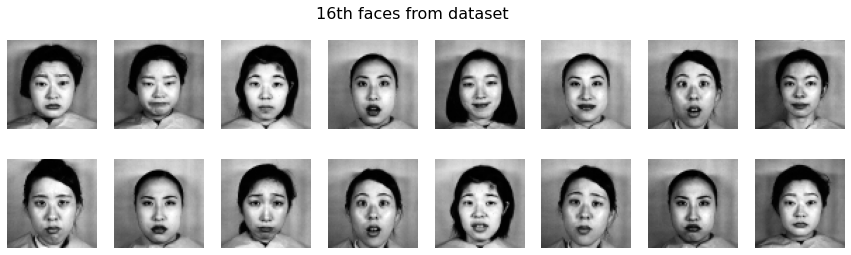

In [ ]:
fig = plt.figure(figsize=(15,4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(img_data[i] , cmap='gray')
    plt.axis('off')
plt.suptitle('16th faces from dataset', size = 16)

In [4]:
#flatten images
def flaten(img_data):
    flat_imgs = np.zeros((len(img_data), 64*64))
    for i in range(len(img_data)):
        flat_imgs[i] = img_data[i].reshape(1,-1)
    return flat_imgs

def zero_mean(dataset):
    mean = np.mean(dataset,axis=0)
    return dataset - mean , mean

In [5]:
flat_imgs = flaten(img_data)
# print(flat_imgs)
zero_mean_data, mean_data = zero_mean(flat_imgs)
# print(mean_data)
# zero_mean_data

In [27]:

class PCA:
    def __init__(self):
        self.n_components = None
        self.components = None
        self.eigen_values = None

    def fit(self, X):
        # X must be actuall images not zero_meaned !!

        # Preprocess data and normalizing with mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        cov = np.cov(X.T)                      # because of np.cov we must send X.T
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T          # for sorting eigenvectors we transpose it
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors
        self.eigen_values = eigenvalues
    
    def get_n_components(self, n_components):
        self.n_components = n_components
        return self.components[0 : self.n_components]

    def project(self, X):
        # X must be actuall images not zero_meaned !! 
        X = X - self.mean
        return np.dot(X, self.components[0: self.n_components].T)     # compo.T because we save transpose of eigenvectors 

    def reconsturct(self, X_projected):
        return X_projected @ self.components[0: self.n_components] + self.mean




In [ ]:
X = flat_imgs
y = labels
print("Shape of X:", X.shape)

# Project the data onto the 10 primary principal components
n_components = 10

pca = PCA()
pca.fit(X)
W = pca.get_n_components(n_components)
print("Shape of W:", W.shape)

X_projected = pca.project(X)
print("Shape of projected X:", X_projected.shape)

X_reconstruct = pca.reconsturct(X_projected)

print("Shape of reconstructed X:", X_reconstruct.shape)


Shape of X: (170, 4096)
Shape of W: (10, 4096)
Shape of projected X: (170, 10)
Shape of reconstructed X: (170, 4096)


Text(0.5, 0.98, 'eigen faces')

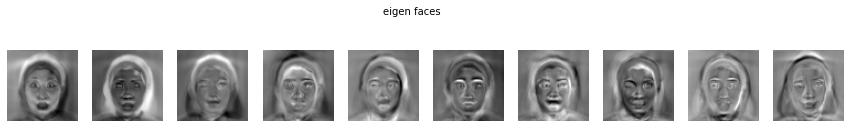

In [ ]:
fig = plt.figure(figsize=(15,4))
for i in range(n_components):
    plt.subplot(2,10,i+1)
    plt.imshow(W.real[i].reshape(64, 64) , cmap='gray')
    plt.axis('off')
plt.suptitle('eigen faces', size = n_components)

In [ ]:
X = flat_imgs
y = labels
print("Shape of X:", X.shape)

n_components = 2

pca = PCA()
pca.fit(X)
W = pca.get_n_components(n_components)
print("Shape of W:", W.shape)

X_projected = pca.project(X)
print("Shape of projected X:", X_projected.shape)

X_reconstruct = pca.reconsturct(X_projected)
print("Shape of reconstructed X:", X_reconstruct.shape)

Shape of X: (170, 4096)
Shape of W: (2, 4096)
Shape of projected X: (170, 2)
Shape of reconstructed X: (170, 4096)


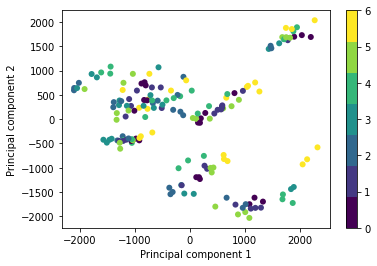

In [ ]:
def plot_2_pca(X_projected):
    x1, x2 = X_projected.real[:, 0], X_projected.real[:, 1]

    plt.scatter(x1, x2, c=labels, edgecolor="none", cmap=plt.cm.get_cmap("viridis", 7)) 
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.colorbar()
    plt.show()

plot_2_pca(X_projected)

In [ ]:
X = flat_imgs
y = labels
print("Shape of X:", X.shape)

n_components = 3

pca = PCA()
pca.fit(X)
W = pca.get_n_components(n_components)
print("Shape of W:", W.shape)

X_projected = pca.project(X)
print("Shape of projected X:", X_projected.shape)

X_reconstruct = pca.reconsturct(X_projected)
print("Shape of reconstructed X:", X_reconstruct.shape)

Shape of X: (170, 4096)
Shape of W: (3, 4096)
Shape of projected X: (170, 3)
Shape of reconstructed X: (170, 4096)


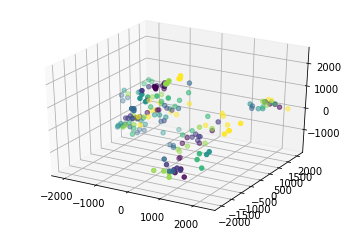

In [ ]:
def plot_3_pca(X_projected):
    x1, x2, x3 = X_projected.real[:, 0], X_projected.real[:, 1], X_projected.real[:, 2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, x3, c=labels)
    # plt.scatter(x1, x2, c=y, edgecolor="none", cmap=plt.cm.get_cmap("viridis", 7)) 
    plt.show()

plot_3_pca(X_projected)

In [ ]:
def plot_recontruct(X_reconstruct, X, k):

    fig2 = plt.figure(figsize=(15,4))
    for i in range(8):
        plt.subplot(2,8,i+1)
        plt.imshow(X[i].reshape(64,64) , cmap='gray')
        plt.axis('off')
    plt.suptitle('Main images ', size = 8)

    fig = plt.figure(figsize=(15,4))
    for i in range(8):
        plt.subplot(2,8,i+1)
        plt.imshow(X_reconstruct.real[i].reshape(64, 64) , cmap='gray')
        plt.axis('off')
    text = 'Reconstructed by '+ str(k)
    plt.suptitle(text, size = 8)


In [ ]:
# K principle components     K = 1
X = flat_imgs
y = labels
print("Shape of X:", X.shape)

n_components = 1

pca = PCA()
pca.fit(X)
W = pca.get_n_components(n_components)
print("Shape of W:", W.shape)

X_projected = pca.project(X)
print("Shape of projected X:", X_projected.shape)

X_reconstruct = pca.reconsturct(X_projected)
print("Shape of reconstructed X:", X_reconstruct.shape)

Shape of X: (170, 4096)
Shape of W: (1, 4096)
Shape of projected X: (170, 1)
Shape of reconstructed X: (170, 4096)


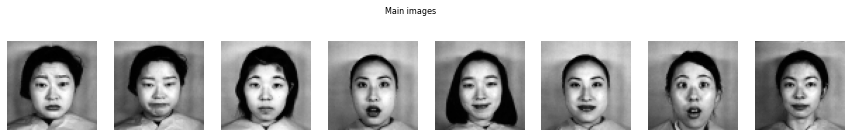

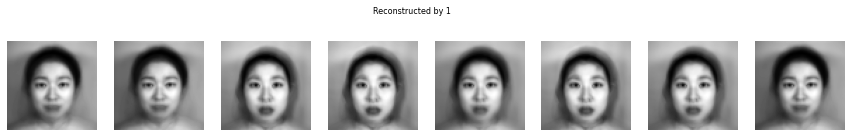

In [ ]:
plot_recontruct(X_reconstruct, X, 1) 

In [ ]:
# K principle components     K = 40
X = flat_imgs
y = labels
print("Shape of X:", X.shape)

n_components = 40

pca = PCA()
pca.fit(X)
W = pca.get_n_components(n_components)
print("Shape of W:", W.shape)

X_projected = pca.project(X)
print("Shape of projected X:", X_projected.shape)

X_reconstruct = pca.reconsturct(X_projected)
print("Shape of reconstructed X:", X_reconstruct.shape)

Shape of X: (170, 4096)
Shape of W: (40, 4096)
Shape of projected X: (170, 40)
Shape of reconstructed X: (170, 4096)


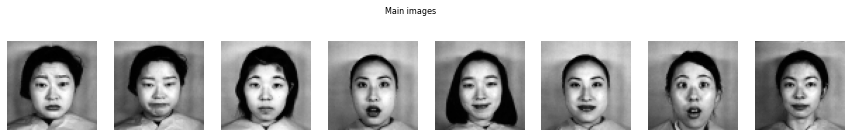

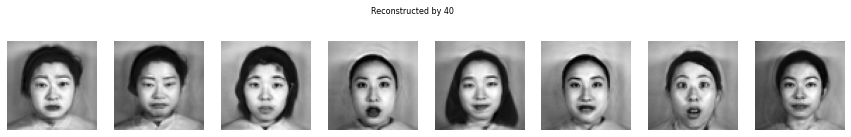

In [ ]:
plot_recontruct(X_reconstruct, X, 40) 

In [ ]:
# K principle components     K = 120
X = flat_imgs
y = labels
print("Shape of X:", X.shape)

n_components = 120

pca = PCA()
pca.fit(X)
W = pca.get_n_components(n_components)
print("Shape of W:", W.shape)

X_projected = pca.project(X)
print("Shape of projected X:", X_projected.shape)

X_reconstruct = pca.reconsturct(X_projected)
print("Shape of reconstructed X:", X_reconstruct.shape)

Shape of X: (170, 4096)
Shape of W: (120, 4096)
Shape of projected X: (170, 120)
Shape of reconstructed X: (170, 4096)


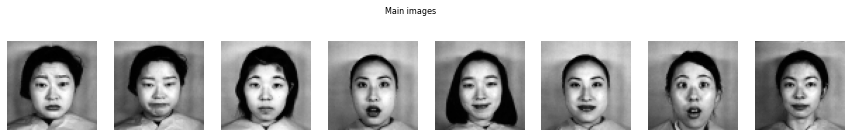

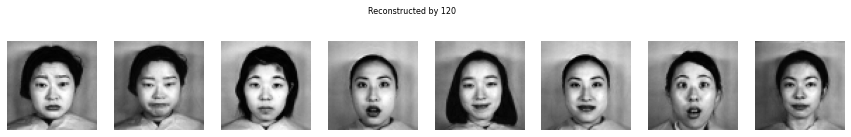

In [ ]:
plot_recontruct(X_reconstruct, X, 120) 

In [ ]:
def plot_eigenfaces(W, n):
    fig = plt.figure(figsize=(15,4))
    for i in range(n):
        plt.subplot(2,10,i+1)
        plt.imshow(W.real[i].reshape(64, 64) , cmap='gray')
        plt.axis('off')
    plt.suptitle("First "+str(n)+' eigenfaces', size = n)

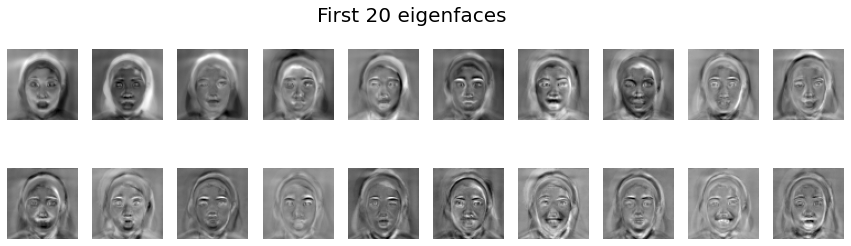

In [ ]:
plot_eigenfaces(W, 20)

## **Plotting MSE in terms of diffrent number of eigen vectors**

optimum k= 193   |  mse_arr= (3.7809672029088277e-19-5.649749332314497e-42j)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


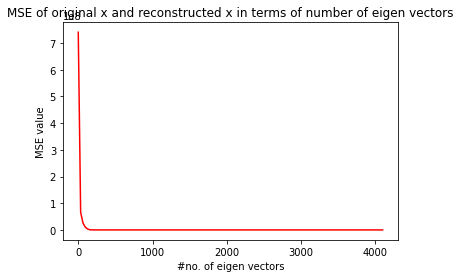

In [34]:
from sklearn.metrics import mean_squared_error
import math
# mse = []
# for i in range(flatten_images.shape[1]):
#     mse.append(mean_squared_error(flatten_images[:, i], reconstructed_data[:, i]))

def MSE_element_wise(x_original, x_reconstruct):
  # mse = (np.square(x_original - x_reconstruct.real)).mean(axis=None)
  # mse = mean_squared_error(x_original, x_reconstruct.real)
  # mse = np.sum(np.square(x_original - x_reconstruct.real))/2
  mse = (np.sum((x_original - x_reconstruct)**2))
  return mse

def MSE_element_wise(x_original, x_reconstruct):
  mse = (np.sum((x_original - x_reconstruct)**2))
  return mse

def find_mse_arr(X):
  # find mse for diffrent k (number of eigen vectors) and plot the result
  found_optimum_k = False
  optimum_k = 1
  min_error = math.inf
  epsilon = 0.5
  mse_arr = []
  k_arr = list(range(1, 4097, 32))
  k_arr.append(4096)

  pca = PCA()
  pca.fit(X)

  for k in k_arr:
    # print("calculating k=", k, ".....")
    W = pca.get_n_components(k)
    X_projected = pca.project(X)
    X_reconstruct = pca.reconsturct(X_projected)

    tmp_mse = MSE_element_wise(X, X_reconstruct)
    mse_arr.append(tmp_mse)

    if tmp_mse < epsilon and found_optimum_k==False:
      print("optimum k=", k, "  |  mse_arr=", tmp_mse)
      optimum_k = k
      min_error = tmp_mse
      found_optimum_k = True
  
  return mse_arr, k_arr, optimum_k

def plot_mse_arr(mse_arr, num_of_eigen_vectors_arr):
  # plotting
  plt.title("MSE of original x and reconstructed x in terms of number of eigen vectors")
  plt.xlabel("#no. of eigen vectors")
  plt.ylabel("MSE value")
  plt.plot(num_of_eigen_vectors_arr, mse_arr, color ="red")
  plt.show()

X = flat_imgs
mse_arr, k_arr, optimum_k = find_mse_arr(X)
plot_mse_arr(mse_arr, k_arr)

In [36]:
# K principle components     K = 1
X = flat_imgs
y = labels
print("Shape of X:", X.shape)

n_components = 1

pca = PCA()
pca.fit(X)
W = pca.get_n_components(n_components)
print("Shape of W:", W.shape)

X_projected = pca.project(X)
print("Shape of projected X:", X_projected.shape)

X_reconstruct = pca.reconsturct(X_projected)
print("Shape of reconstructed X:", X_reconstruct.shape)

MSE_element_wise(X[1].real, X_reconstruct[1].real)

Shape of X: (170, 4096)
Shape of W: (1, 4096)
Shape of projected X: (170, 1)
Shape of reconstructed X: (170, 4096)


3848881.902731836

## Finding MSE of original & reconstructed image

## Finding optimum number of eigen vectors
By finding cumulative variance of each principle component

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


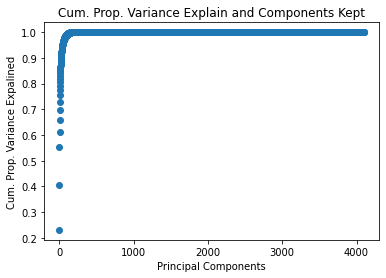

In [37]:
total_var = sum(pca.eigen_values)
cum_var = np.cumsum(pca.eigen_values)/total_var
# x-axis for number of principal components kept
num_comp = range(1,len(pca.eigen_values)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, cum_var)
plt.show()